In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import os
import math
import matplotlib.gridspec as gridspec

def __get_torque(token):
    name = token[1:]
    sign_index = name.find("-")
    if sign_index == 0:
        return [name[:2], name[2:]]
    return [name[:1], name[1:]]

In [2]:
DIRECTORY = "Record_Data\T2"
folders = []
for name in os.listdir(DIRECTORY):
    if name[0] == "X": folders.append(name)

columns = ["X", "Y", "T1", "T2", "ideal_Fx", "measured_Fx_mean","measured_Fx_std", 
           "ideal_Fy", "measured_Fy_mean", "measured_Fy_std"]
df_all = pd.DataFrame(columns=columns)

for folder in folders:
    folder_directory = os.path.join(DIRECTORY, folder)
    x_label = int(folder[1:])
    files = os.listdir(folder_directory)

    for file in files:
        file_directory = os.path.join(folder_directory, file)
        file_name_tokens = file.split("_")
        y_label = int(file_name_tokens[0][1:])
        T1_label, T2_label = __get_torque(file_name_tokens[1])
        file_df = pd.read_csv(file_directory)
        ideal_Fx_label = file_df["Fx"].mean()
        measured_Fx_mean_label = file_df["Fx_Mea"].mean()
        measured_Fx_std_label = file_df["Fx_Mea"].std()

        ideal_Fy_label = file_df["Fy"].mean()
        measured_Fy_mean_label = file_df["Fy_Mea"].mean()
        measured_Fy_std_label = file_df["Fy_Mea"].std()
        
        new_row = {"X": x_label, "Y": y_label, "T1": T1_label, "T2": T2_label,
        "ideal_Fx": ideal_Fx_label, "measured_Fx_mean": measured_Fx_mean_label,
        "measured_Fx_std": measured_Fx_std_label, "ideal_Fy": ideal_Fy_label, 
        "measured_Fy_mean": measured_Fy_mean_label, 
        "measured_Fy_std": measured_Fy_std_label}

        df_all = pd.concat([df_all, pd.DataFrame([new_row])], ignore_index=True)

df_all

,X,Y,T1,T2,ideal_Fx,measured_Fx_mean,measured_Fx_std,ideal_Fy,measured_Fy_mean,measured_Fy_std
0,25,100,-2,-2,-2.920133,-17.55076,1.492637,14.675891,-4.247165,0.346856
1,25,100,-2,0,-5.877493,-6.707554,0.505922,5.507757,-7.764456,0.561479
2,25,100,0,-2,2.579234,-12.08909,1.037652,9.173748,2.99153,0.248584
3,25,100,0,2,-2.423617,9.746326,0.740083,-8.860263,-3.891824,0.283588
4,25,100,2,0,6.06412,5.347242,0.498507,-5.537396,7.27552,0.675039
...,...,...,...,...,...,...,...,...,...,...
247,40,190,-2,0,-8.407392,-1.028508,0.102373,1.056299,-9.86377,0.962597
248,40,190,0,-2,5.488849,-10.916828,0.714047,7.591604,8.220482,0.636867
249,40,190,0,2,-5.807305,8.37555,0.742887,-7.862334,-3.95304,0.721953
250,40,190,2,0,8.25001,1.306318,0.103444,-0.886161,11.462006,0.81092


In [29]:
test_df = df_all[df_all["X"] == 40]
test_df.shape[0]

42

Text(0.5, 0, 'Recording Sessions (Shared)')

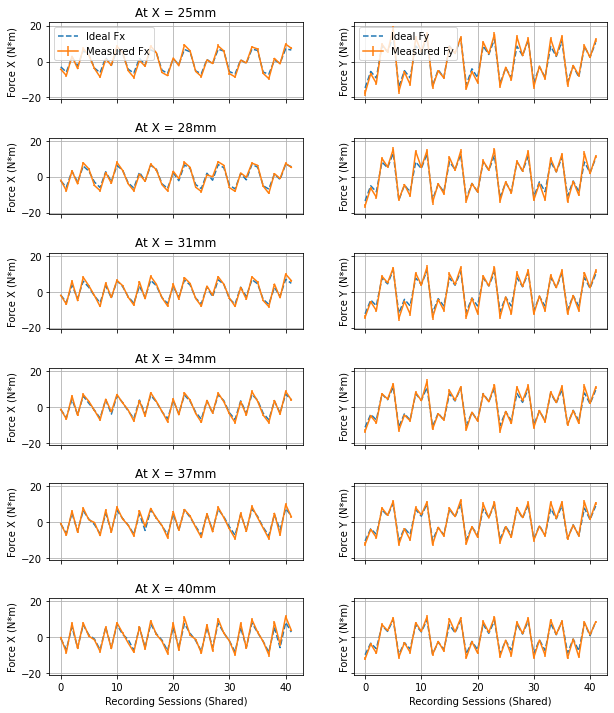

In [85]:
ncols = 2

x_positions = df_all["X"].unique()
nrows = len(x_positions)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 12), sharex='col', sharey=True,
                         gridspec_kw={'hspace': 0.5})

for i in range(len(x_positions)):
    position = x_positions[i]
    filtered_df = df_all[df_all["X"] == position]

    axes[i, 0].plot(range(filtered_df.shape[0]), filtered_df["ideal_Fx"], linestyle="--", label="Ideal Fx") 
    axes[i, 0].errorbar(range(filtered_df.shape[0]), filtered_df["measured_Fy_mean"], yerr=filtered_df["measured_Fy_std"], label="Measured Fx")
    # axes[i, 0].errorbar(range(filtered_df.shape[0]), filtered_df["measured_Fx_mean"], yerr=filtered_df["measured_Fx_std"])
    axes[i, 0].grid(True)
    axes[i, 0].set_ylabel(f'Force X (N*m)')

    axes[i, 1].plot(range(filtered_df.shape[0]), -filtered_df["ideal_Fy"], linestyle="--", label="Ideal Fy")
    axes[i, 1].errorbar(range(filtered_df.shape[0]), filtered_df["measured_Fx_mean"], yerr=filtered_df["measured_Fx_std"], label="Measured Fy")
    # axes[i, 1].errorbar(range(filtered_df.shape[0]), filtered_df["measured_Fy_mean"], yerr=filtered_df["measured_Fy_std"])
    axes[i, 1].grid(True)
    axes[i, 1].set_ylabel(f'Force Y (N*m)')\
    
    axes[i, 0].set_title(f"At X = {x_positions[i]}mm")

axes[0,0].legend()
axes[0,1].legend()
axes[nrows-1, 0].set_xlabel('Recording Sessions (Shared)')
axes[nrows-1, 1].set_xlabel('Recording Sessions (Shared)')



C:\Users\andyb\AppData\Local\Temp\ipykernel_12204\982489138.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


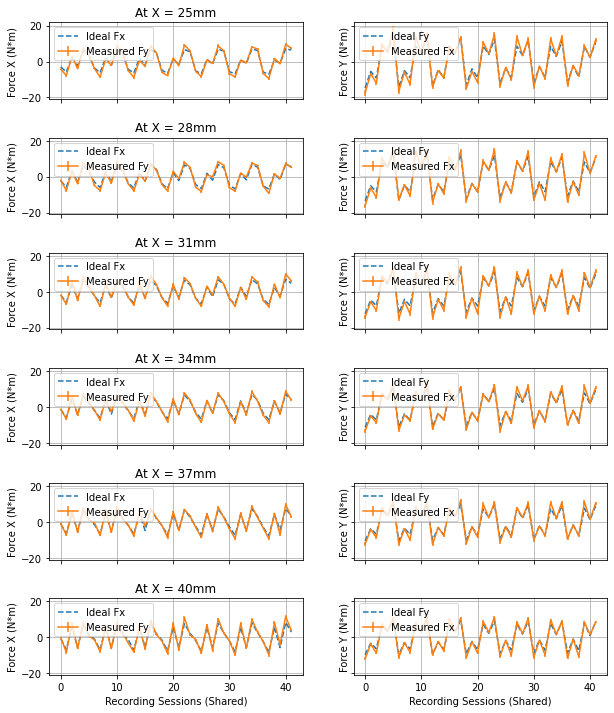

In [82]:
ncols = 2

x_positions = df_all["X"].unique()
nrows = len(x_positions)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 12), sharex='col', sharey=True,
                         gridspec_kw={'hspace': 0.5})

for i in range(len(x_positions)):
    position = x_positions[i]
    filtered_df = df_all[df_all["X"] == position]

    ax1 = axes[i, 0]
    ax1.plot(range(filtered_df.shape[0]), filtered_df["ideal_Fx"], linestyle="--", label="Ideal Fx")
    ax1.errorbar(range(filtered_df.shape[0]), filtered_df["measured_Fy_mean"], yerr=filtered_df["measured_Fy_std"], label="Measured Fy")
    ax1.legend()
    ax1.grid(True)
    ax1.set_ylabel(f'Force X (N*m)')

    ax2 = axes[i, 1]
    ax2.plot(range(filtered_df.shape[0]), -filtered_df["ideal_Fy"], linestyle="--", label="Ideal Fy")
    ax2.errorbar(range(filtered_df.shape[0]), filtered_df["measured_Fx_mean"], yerr=filtered_df["measured_Fx_std"], label="Measured Fx")
    ax2.legend()
    ax2.grid(True)
    ax2.set_ylabel(f'Force Y (N*m)')

    ax1.set_title(f"At X = {x_positions[i]}mm")

axes[nrows-1, 0].set_xlabel('Recording Sessions (Shared)')
axes[nrows-1, 1].set_xlabel('Recording Sessions (Shared)')

# Adjust layout to avoid overlapping labels and titles
plt.tight_layout()

# Show the figure
plt.show()
